In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

In [44]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [45]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Testing set score: 0.61


In [46]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Testing set score: 0.75


In [47]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("testing set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
testing set score: 0.64


In [48]:
ridge01 = Ridge(alpha= 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Testing set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Testing set score: 0.77


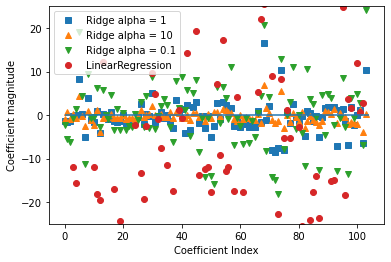

In [49]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0 , len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

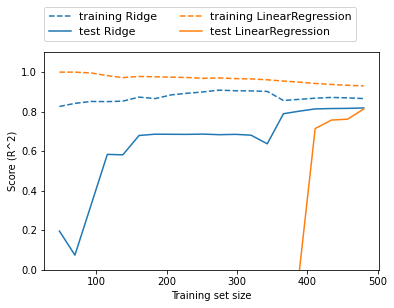

In [50]:
mglearn.plots.plot_ridge_n_samples()

In [51]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Testing set score: 0.21
Number of features used: 4


In [52]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("testing set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
testing set score: 0.77
Number of features used: 33


In [53]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_!= 0)))

Training set score: 0.95
Testing set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient Magnitude')

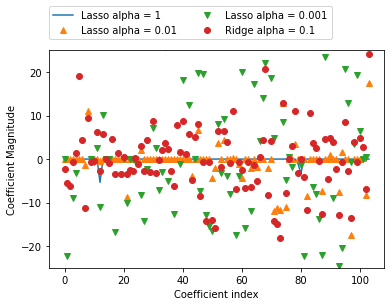

In [54]:
plt.plot(lasso.coef_, label = "Lasso alpha = 1")
plt.plot(lasso001.coef_,'^',  label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient Magnitude")

F:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


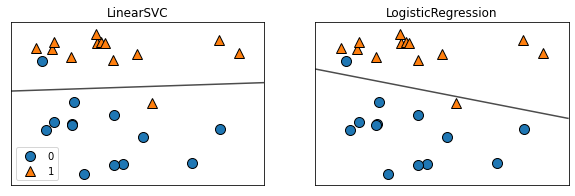

In [55]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize = (10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_label("Feature 0 ")
    ax.set_label("Feature 1")
axes[0].legend()

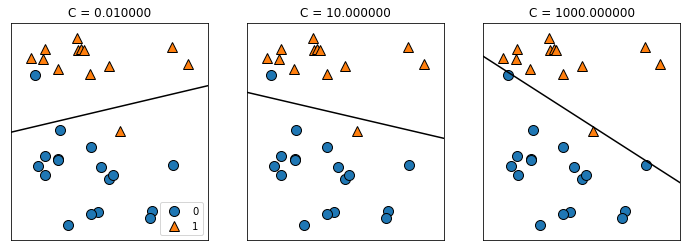

In [56]:
mglearn.plots.plot_linear_svc_regularization()

In [65]:
cancer = load_breast_cancer()

X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.941
Testing set score: 0.958


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(logreg100.score(X_test, y_test)))

training set score: 0.946
Testing set score: 0.958


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
logreg001 = LogisticRegression(C= 0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Testing set score: 0.930


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


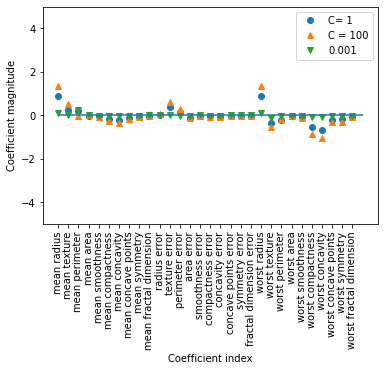

In [71]:
plt.plot(logreg.coef_.T, 'o' , label = "C= 1")
plt.plot(logreg100.coef_.T, '^', label = "C = 100")
plt.plot(logreg001.coef_.T, 'v', label = "0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()